#  Customer Personality Analysis

In [65]:
Context
Problem Statement

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

Content
Attributes

People

ID: Customer's unique identifier
Year_Birth: Customer's birth year
Education: Customer's education level
Marital_Status: Customer's marital status
Income: Customer's yearly household income
Kidhome: Number of children in customer's household
Teenhome: Number of teenagers in customer's household
Dt_Customer: Date of customer's enrollment with the company
Recency: Number of days since customer's last purchase
Complain: 1 if customer complained in the last 2 years, 0 otherwise
Products

MntWines: Amount spent on wine in last 2 years
MntFruits: Amount spent on fruits in last 2 years
MntMeatProducts: Amount spent on meat in last 2 years
MntFishProducts: Amount spent on fish in last 2 years
MntSweetProducts: Amount spent on sweets in last 2 years
MntGoldProds: Amount spent on gold in last 2 years
Promotion

NumDealsPurchases: Number of purchases made with a discount
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
Place

NumWebPurchases: Number of purchases made through the company’s web site
NumCatalogPurchases: Number of purchases made using a catalogue
NumStorePurchases: Number of purchases made directly in stores
NumWebVisitsMonth: Number of visits to company’s web site in the last month

SyntaxError: invalid syntax (<ipython-input-65-ca83c4c72374>, line 2)

In [ ]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import opendatasets as od

import os


import plotly.express as px

%matplotlib inline

# Target: Need to perform clustering to summarize customer segments 

## Reading Data 

In [ ]:
customer=pd.read_csv('marketing_campaign.csv', delimiter='\t')
customer.head()

In [ ]:
customer.info()

In [ ]:
customer.shape

In [ ]:
customer.size

In [ ]:
customer.describe()

## Preparing Data 

In [66]:
missingValues = customer.isna().sum().to_dict()
missingValues_df = pd.DataFrame(list(missingValues.items()), columns = ['Column', 'Missing_Values'])
# missingValues_df

fig = px.bar(missingValues_df,
            x = 'Column', y = 'Missing_Values',
#             template = 'plotly_red',
            title = 'Missing Values')
fig.show()

In [67]:
customer = customer.dropna()
customer.shape

(2157, 36)

In [68]:
import datetime as dt
customer['Age'] = 2015 - customer.Year_Birth
customer['Age']

<ipython-input-68-1bb842e57fa4>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0       58
1       61
2       50
3       31
4       34
        ..
2235    48
2236    69
2237    34
2238    59
2239    61
Name: Age, Length: 2157, dtype: int64

In [69]:
customer['Dt_Customer'] = pd.to_datetime(customer['Dt_Customer'])
customer['Month_Customer'] = 12.0 * (2015 - customer.Dt_Customer.dt.year ) + (1 - customer.Dt_Customer.dt.month)

customer['Dt_Customer']


<ipython-input-69-b4a6ec2f534a>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-69-b4a6ec2f534a>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0      2012-04-09
1      2014-08-03
2      2013-08-21
3      2014-10-02
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-10-06
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2157, dtype: datetime64[ns]

In [70]:
customer['Month_Customer'] 

0       33.0
1        5.0
2       17.0
3        3.0
4       12.0
        ... 
2235    19.0
2236     3.0
2237    12.0
2238    12.0
2239    27.0
Name: Month_Customer, Length: 2157, dtype: float64

In [71]:
# MntWines: Amount spent on wine in last 2 years
# MntFruits: Amount spent on fruits in last 2 years
# MntMeatProducts: Amount spent on meat in last 2 years
# MntFishProducts: Amount spent on fish in last 2 years
# MntSweetProducts: Amount spent on sweets in last 2 years
# MntGoldProds: Amount spent on gold in last 2 years

customer['Total_Spending'] = (customer.MntWines + customer.MntFruits + 
                              customer.MntMeatProducts + customer.MntFishProducts + 
                              customer.MntSweetProducts + customer.MntGoldProds)

customer['Total_Spending'].head()

<ipython-input-71-9f9893f12248>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0    1617
1      27
2     776
3      53
4     422
Name: Total_Spending, dtype: int64

In [72]:
customer['Average_Spending'] = ((customer.MntWines + customer.MntFruits + 
                              customer.MntMeatProducts + customer.MntFishProducts + 
                              customer.MntSweetProducts + customer.MntGoldProds)/6)
customer['Average_Spending'].head()

<ipython-input-72-e940c79ec3bc>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0    269.500000
1      4.500000
2    129.333333
3      8.833333
4     70.333333
Name: Average_Spending, dtype: float64

In [73]:
# customer.info()

In [74]:
customer.loc[(customer['Age'] >= 13) & (customer['Age'] <= 19), 'AgeGroup'] = 'Teen'
customer.loc[(customer['Age'] >= 20) & (customer['Age']<= 39), 'AgeGroup'] = 'Adult'
customer.loc[(customer['Age'] >= 40) & (customer['Age'] <= 59), 'AgeGroup'] = 'Middle Age Adult'
customer.loc[(customer['Age'] > 60), 'AgeGroup'] = 'Senior Adult'

customer['AgeGroup'].head()

C:\Users\rushi\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\rushi\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\rushi\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

0    Middle Age Adult
1        Senior Adult
2    Middle Age Adult
3               Adult
4               Adult
Name: AgeGroup, dtype: object

In [75]:
customer['Children'] = customer['Kidhome'] + customer['Teenhome']
customer['Children']

<ipython-input-75-ae7a827fc2c8>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: Children, Length: 2157, dtype: int64

In [76]:
# df['Kidhome']

In [77]:
customer.Marital_Status = customer.Marital_Status.replace({'Together': 'Partner',
                                                           'Married': 'Partner',
                                                           'Divorced': 'Single',
                                                           'Widow': 'Single', 
                                                           'Alone': 'Single',
                                                           'Absurd': 'Single',
                                                           'YOLO': 'Single'})
customer['Marital_Status'].head()

C:\Users\rushi\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0     Single
1     Single
2    Partner
3    Partner
4    Partner
Name: Marital_Status, dtype: object

Text(0.5, 1.0, 'Visualizing for Outliers in Age')

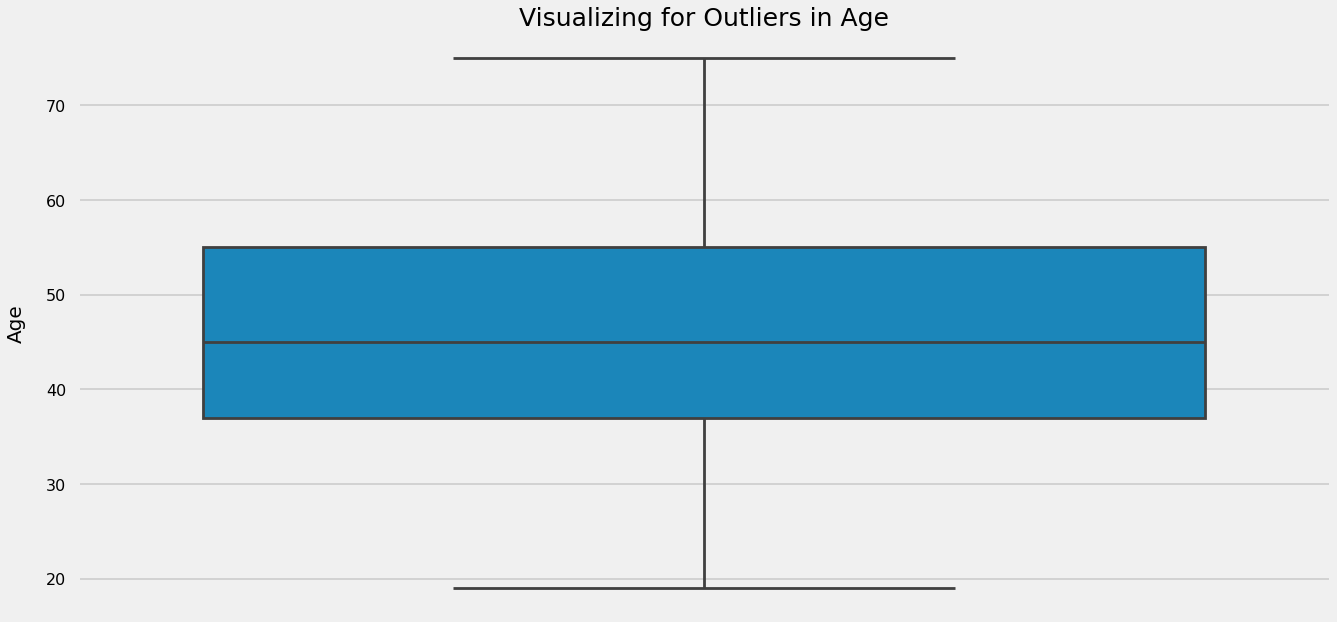

In [78]:
plt.figure(figsize = (20, 10))
sns.boxplot(y = customer.Age)
plt.ylabel('Age', fontsize = 20, labelpad = 20)
plt.title('Visualizing for Outliers in Age', fontsize = 25)

Text(0.5, 1.0, 'Visualizing for Outliers in Income of the Customers')

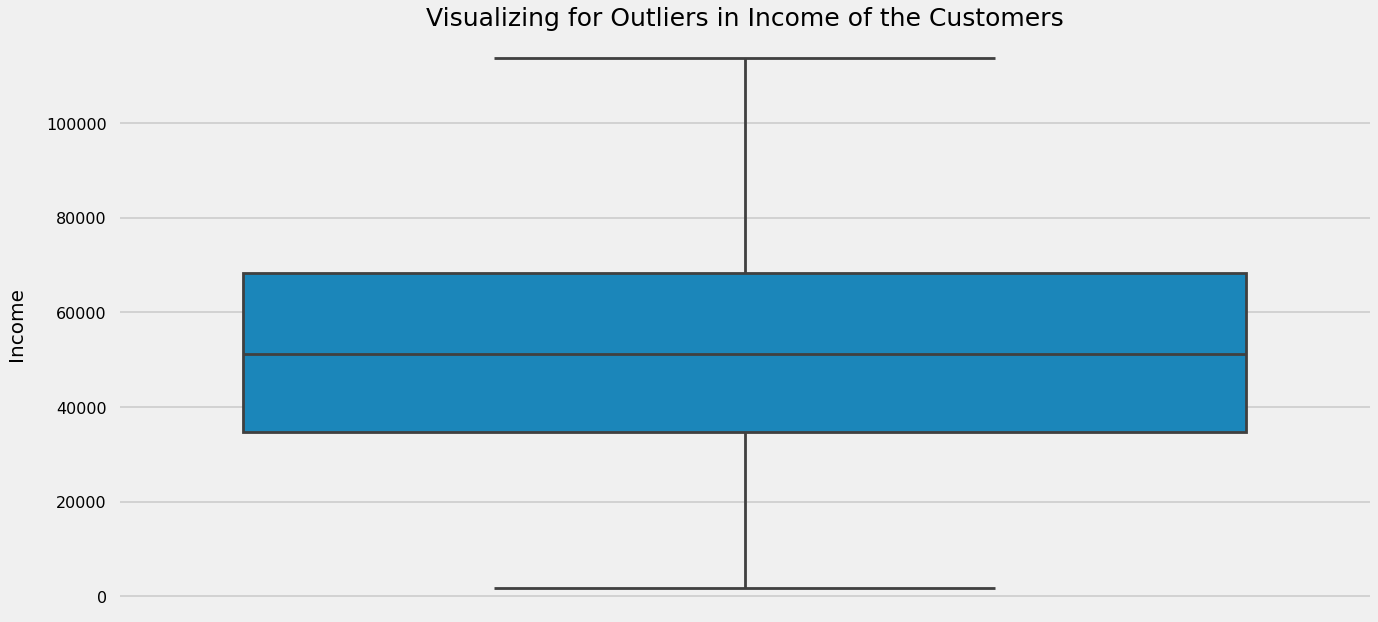

In [79]:
plt.figure(figsize = (20, 10))
sns.boxplot(y = customer.Income)
plt.ylabel('Income', fontsize = 20, labelpad = 20)
plt.title('Visualizing for Outliers in Income of the Customers', fontsize = 25)

In [80]:
customer = customer[customer.Age < 100]
customer = customer[customer.Income < 120000]

## Exploratory Data Analysis

### Marital Status Analysis

In [81]:
maritalStatus = customer.Marital_Status.value_counts()
# maritalStatus

fig = px.pie(maritalStatus,
             values = maritalStatus.values,
             names = maritalStatus.index,
             color_discrete_sequence = px.colors.sequential.RdBu,
            title = 'Marital Status')
fig.update_traces(textposition = 'inside', textinfo = 'percent+label',
                 marker = dict(line = dict(color = 'white', width = 3)))
fig.show()

### Marital Spending 

Text(0.5, 1.0, 'Relation b/w Marital Status and Average Spending')

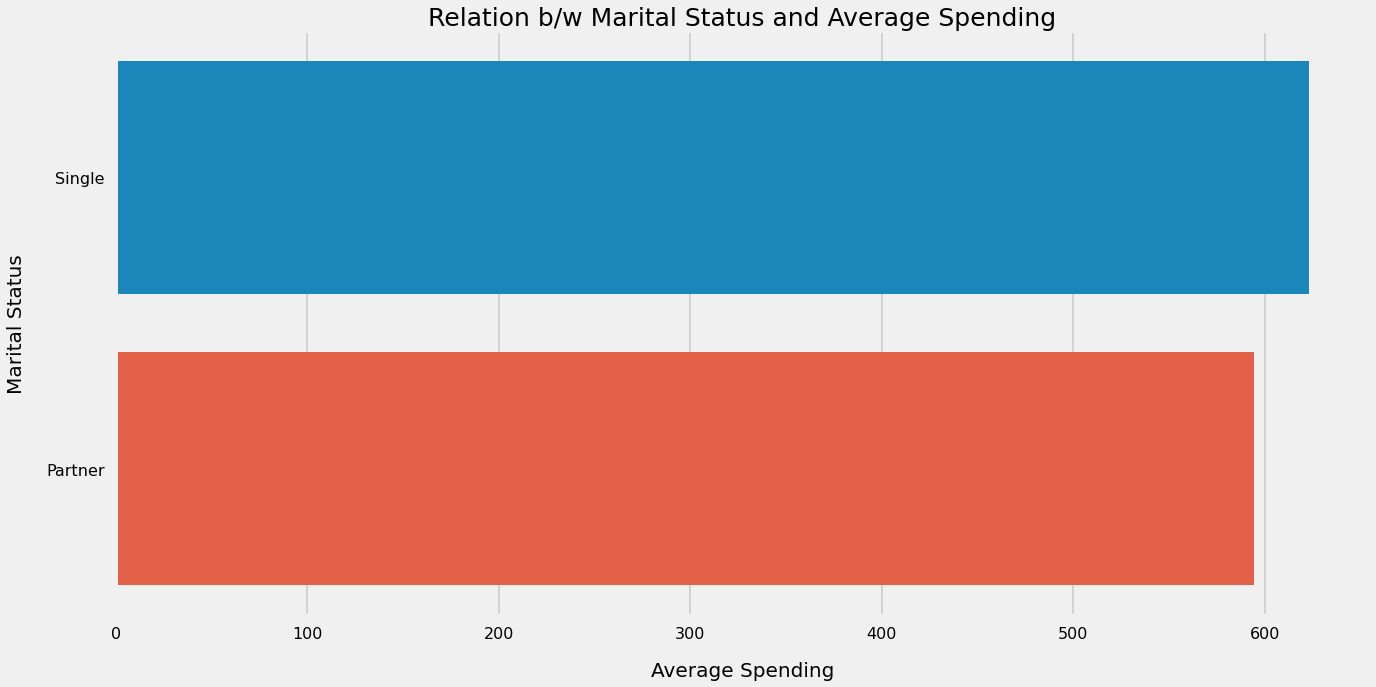

In [82]:
maritalSpending = customer.groupby('Marital_Status')['Total_Spending'].mean().sort_values(ascending = False)
maritalSpending_df = pd.DataFrame(list(maritalSpending.items()), columns = ['Marital Status', 'Average Spending'])

plt.figure(figsize = (20, 10))
sns.barplot(data = maritalSpending_df, x = 'Average Spending', y = 'Marital Status');

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Average Spending', fontsize = 20, labelpad = 20)
plt.ylabel('Marital Status', fontsize = 20, labelpad = 20)
plt.title('Relation b/w Marital Status and Average Spending', fontsize = 25)

### Education Level 

In [83]:
education = customer.Education.value_counts()

fig = px.pie(education,
             values = education.values,
             names = education.index,
             color_discrete_sequence = px.colors.sequential.RdBu,
            title = 'Education Level of the Customers')
fig.update_traces(textposition = 'inside', textinfo = 'percent+label',
                 marker = dict(line = dict(color = 'white', width = 2)))
fig.show()

### Children Status 

In [84]:
children = customer.Children.value_counts()

fig = px.pie(education,
             values = children.values,
             names = children.index,
             color_discrete_sequence = px.colors.sequential.RdBu,
            title = 'Number of Children in Customers house')
fig.update_traces(textposition = 'inside', textinfo = 'percent+label',
                 marker = dict(line = dict(color = 'white', width = 2)))
fig.show()

### Children wise Average Spending  

Text(0.5, 1.0, 'Relation b/w Number of Children and Average Spending')

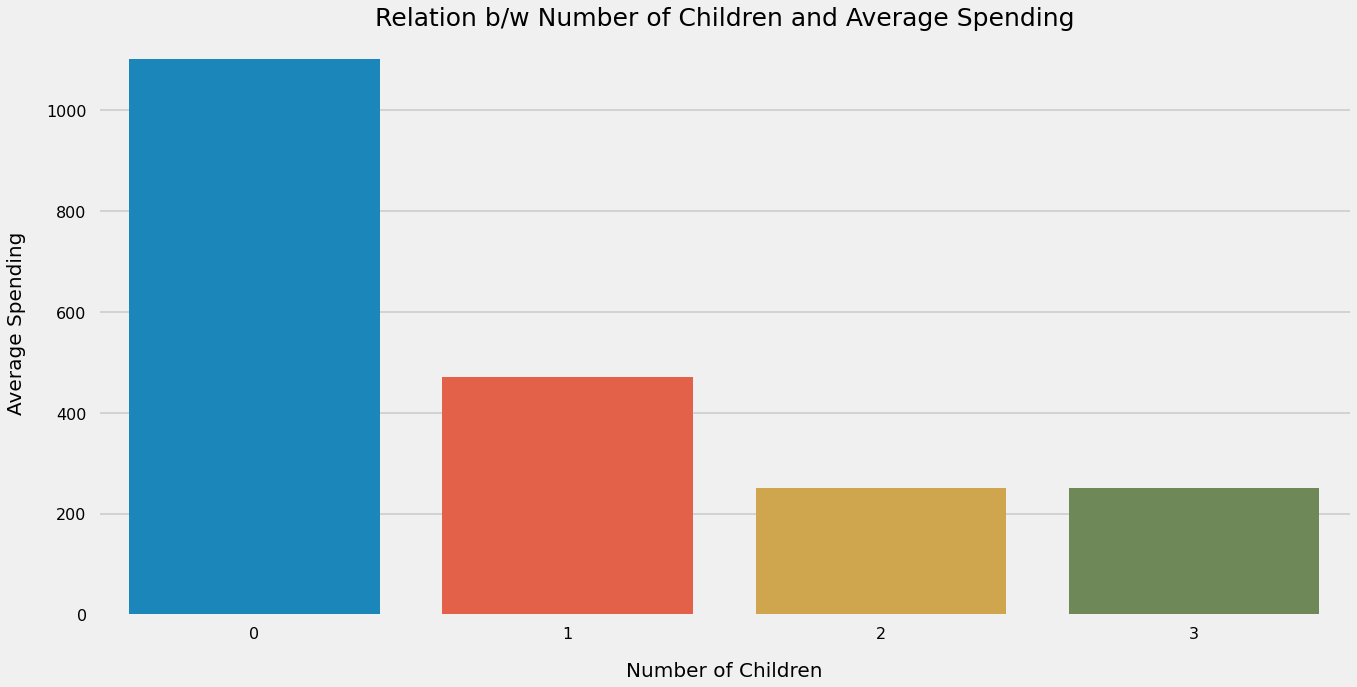

In [85]:
childrenSpending = customer.groupby('Children')['Total_Spending'].mean().sort_values(ascending = False)
childrenSpending_df = pd.DataFrame(list(childrenSpending.items()), columns = ['Children', 'AverageSpending'])

plt.figure(figsize = (20, 10))
sns.barplot(data = childrenSpending_df, x = 'Children', y = 'AverageSpending');

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Number of Children', fontsize = 20, labelpad = 20)
plt.ylabel('Average Spending', fontsize = 20, labelpad = 20)
plt.title('Relation b/w Number of Children and Average Spending', fontsize = 25)

### Histogram based on age of the Customers 

Text(0, 0.5, 'Count')

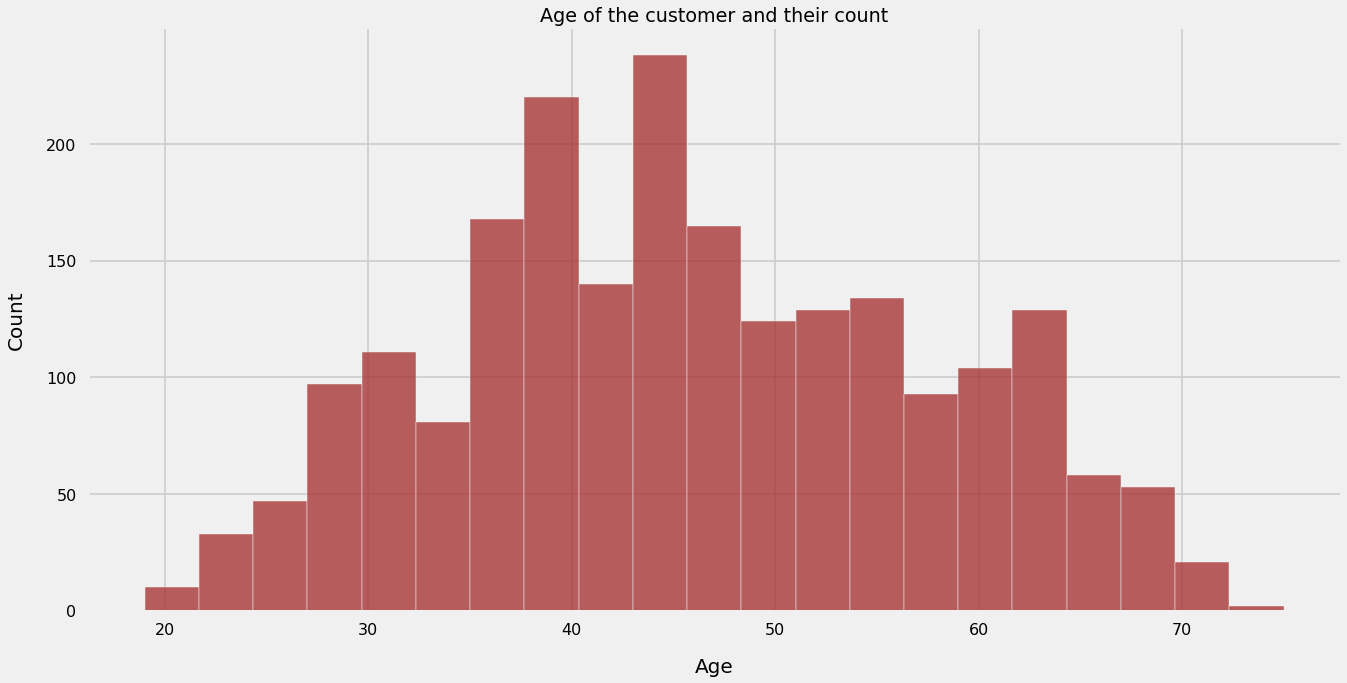

In [86]:
plt.figure(figsize = (20, 10))
ax = sns.histplot(data = customer.Age, color = 'brown');
ax.set(title = 'Age of the customer and their count')

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Age', fontsize = 20, labelpad = 20)
plt.ylabel('Count', fontsize = 20, labelpad = 20)

### Relation b/w Age and Spending 

Text(0.5, 1.0, 'Age of the Customer and their Total Spending')

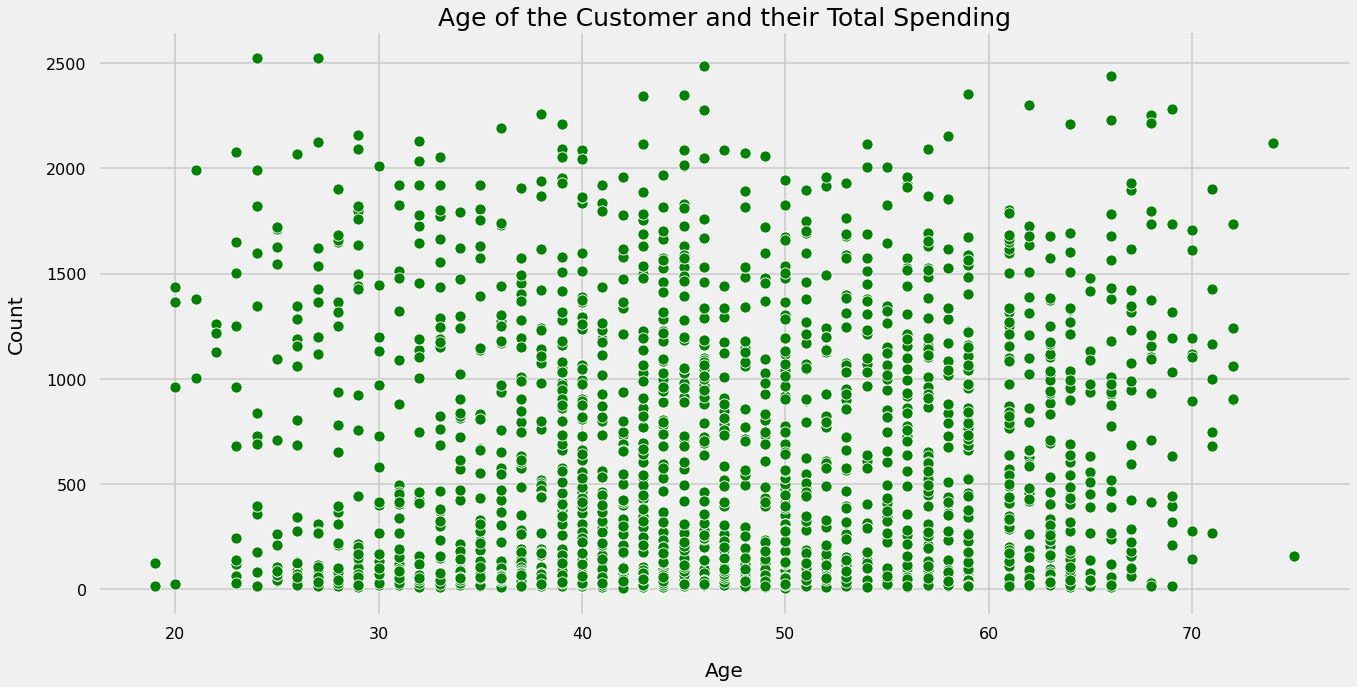

In [87]:
plt.figure(figsize = (20, 10))
ax = sns.scatterplot(x = customer.Age, y = customer.Total_Spending, color = 'green');
# ax.set(title = 'Age of the Customer and their Total Spending', fontsize = 25)

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Age', fontsize = 20, labelpad = 20)
plt.ylabel('Count', fontsize = 20, labelpad = 20)
plt.title('Age of the Customer and their Total Spending', fontsize = 25)

### Customer Segmentation Age Group wise

In [88]:
agegroup = customer.AgeGroup.value_counts()

fig = px.pie(agegroup, values = agegroup.values, names = agegroup.index, width = 550,
             height = 550, title = 'Customer Segmentation Age Group wise')

fig.update_traces(textposition = 'inside',
                 textinfo = 'percent+label',
                 hole = 0.750,
                 marker = dict(colors = ['#3D0C02', '#800000'  , '#C11B17','#C0C0C0'],
                              line = dict(color = 'white', width = 2)))
fig.update_layout(annotations = [dict(text = 'Age Groups', x = 0.5, y = 0.5, font_size = 36,
                                      showarrow = False, font_color = 'Black')],
                  showlegend = True)


fig.show()

### Average Spending Age Group Wise 

Text(0.5, 1.0, 'Relation b/w different Age Group and Average Spending')

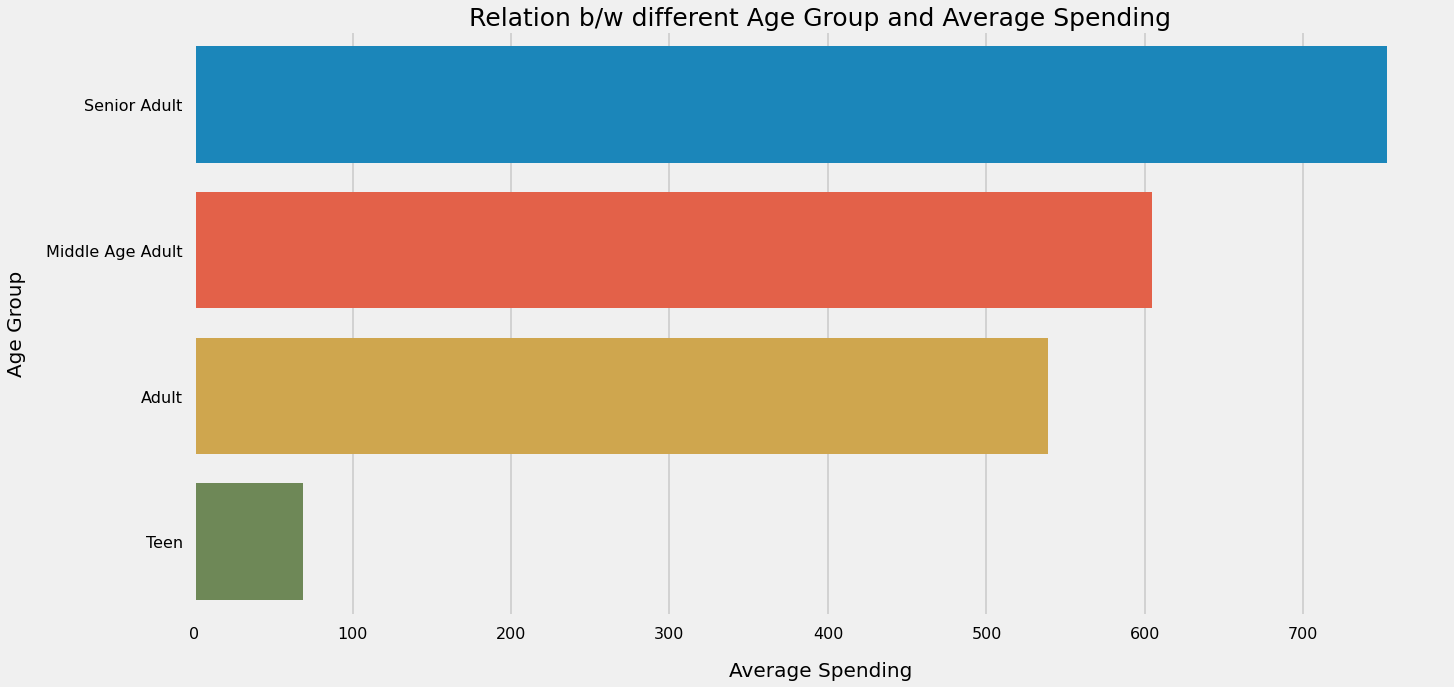

In [89]:
AgeGroupSpending = customer.groupby('AgeGroup')['Total_Spending'].mean().sort_values(ascending = False)
AgeGroupSpending_df = pd.DataFrame(list(AgeGroupSpending.items()), columns = ['AgeGroup', 'AverageSpending'])

plt.figure(figsize = (20, 10))
sns.barplot(data = AgeGroupSpending_df, x = 'AverageSpending', y = 'AgeGroup');

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Average Spending', fontsize = 20, labelpad = 20)
plt.ylabel('Age Group', fontsize = 20, labelpad = 20)
plt.title('Relation b/w different Age Group and Average Spending', fontsize = 25)

### Income Distribution of customers 

Text(0, 0.5, 'Count')

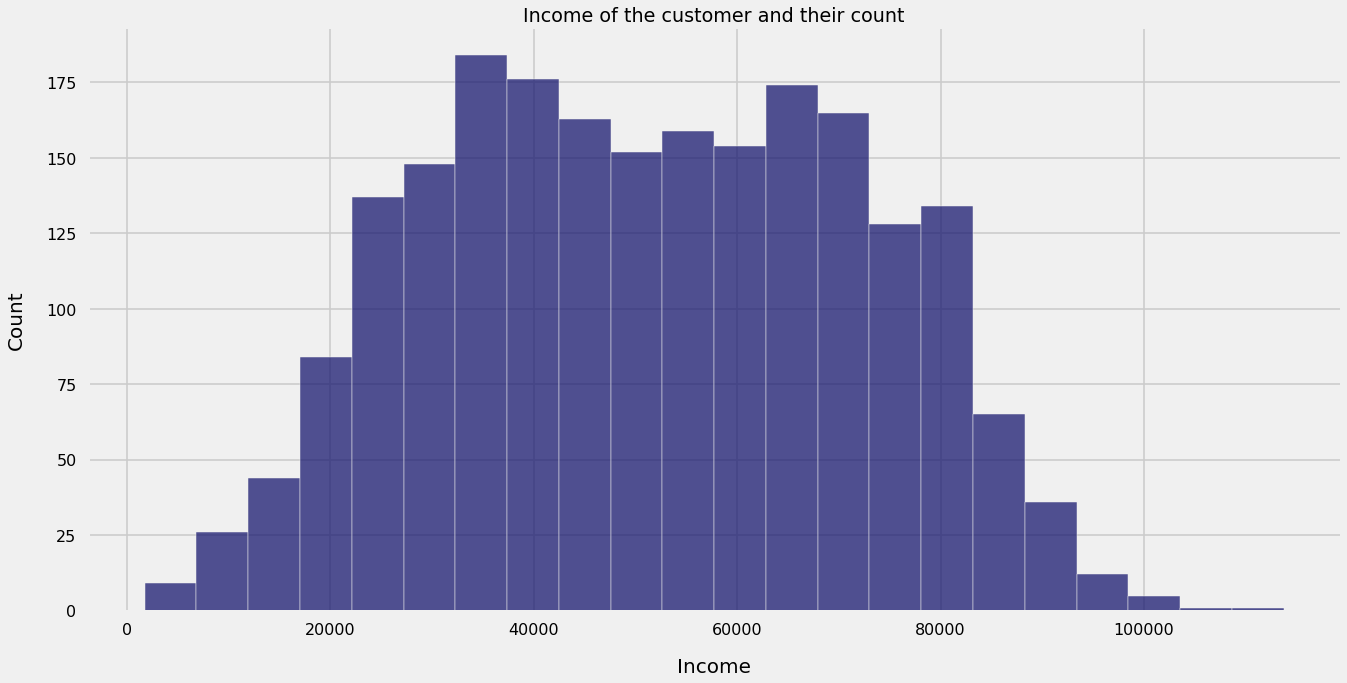

In [90]:
plt.figure(figsize = (20, 10))
ax = sns.histplot(data = customer.Income, color = 'midnightblue');
ax.set(title = 'Income of the customer and their count')

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Income', fontsize = 20, labelpad = 20)
plt.ylabel('Count', fontsize = 20, labelpad = 20)

### Relation between Total Spending and Income 

Text(0.5, 1.0, 'Income of the Customer and their Total Spending')

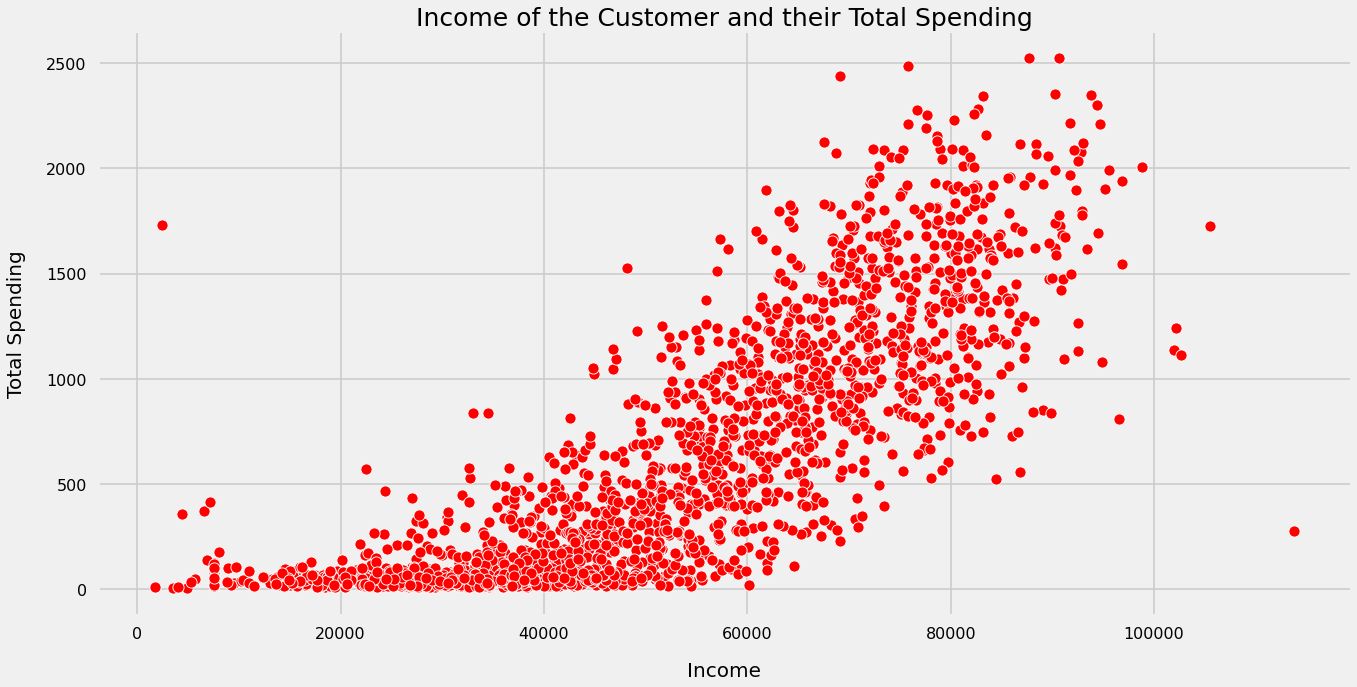

In [91]:
plt.figure(figsize = (20, 10))
ax = sns.scatterplot(x = customer.Income, y = customer.Total_Spending, color = 'Red');
# ax.set(title = 'Age of the Customer and their Total Spending', fontsize = 25)

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Income', fontsize = 20, labelpad = 20)
plt.ylabel('Total Spending', fontsize = 20, labelpad = 20)
plt.title('Income of the Customer and their Total Spending', fontsize = 25)

### Most bought Products

Text(0.5, 1.0, 'Relation b/w Products and Average Spending')

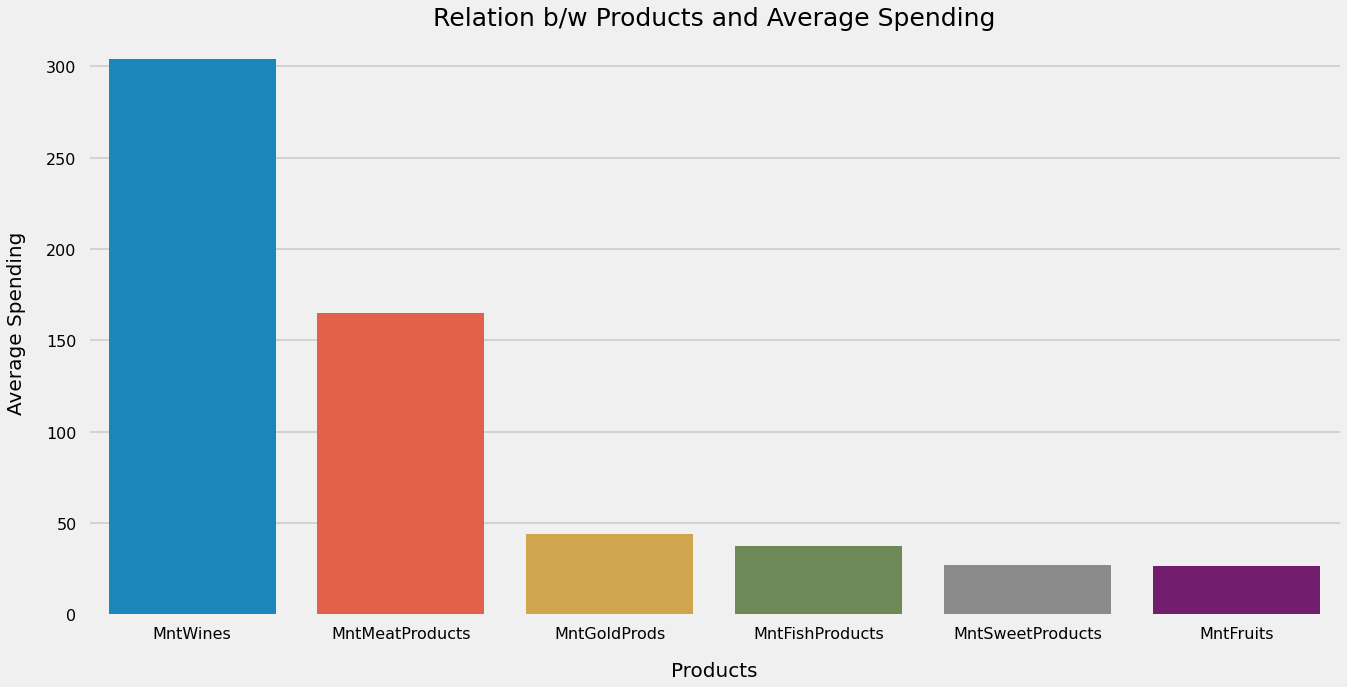

In [92]:
products = customer[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
product_means = products.mean(axis = 0).sort_values(ascending = False)
product_df = pd.DataFrame(list(product_means.items()), columns = ['Products', 'Average Spendings'])

plt.figure(figsize = (20, 10))
sns.barplot(data = product_df, x = 'Products', y = 'Average Spendings');

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Products', fontsize = 20, labelpad = 20)
plt.ylabel('Average Spending', fontsize = 20, labelpad = 20)
plt.title('Relation b/w Products and Average Spending', fontsize = 25)

## Cluster Modelling 

In [93]:
X = customer.drop(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'MntWines', 'MntFruits','MntMeatProducts',
                          'MntFishProducts', 'MntSweetProducts', 'MntGoldProds','Dt_Customer', 'Z_CostContact',
                          'Z_Revenue', 'Recency', 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases',
                          'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
                          'AcceptedCmp1', 'AcceptedCmp2', 'Complain',  'Response', 'AgeGroup'], axis=1)
X.head()

,Income,Age,Month_Customer,Total_Spending,Average_Spending,Children,Clusters
0,58138.0,58,33.0,1617,269.500000,0,Platinum
1,46344.0,61,5.0,27,4.500000,2,Gold
2,71613.0,50,17.0,776,129.333333,0,Diamond
3,26646.0,31,3.0,53,8.833333,1,Silver
4,58293.0,34,12.0,422,70.333333,1,Platinum


### Chosing No. of Cluster using Elbow Method 

In [94]:
from sklearn.cluster import KMeans

In [95]:
options = range(2, 9)
inertias = []

for n_cluster in options:
    model = KMeans(n_cluster, random_state = 42).fit(X)
    inertias.append(model.inertia_)
    
plt.figure(figsize = (20, 10))
plt.plot(options, inertias, '-o');

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Cluster', fontsize = 20, labelpad = 20)
plt.ylabel('Inertia', fontsize = 20, labelpad = 20)
plt.title('Number of Clusters VS Inertia', fontsize = 25)

ValueError: could not convert string to float: 'Platinum'

In [ ]:
model = KMeans(4, init ='k-means++', random_state = 42).fit(X)

preds = model.predict(X)

customer_clusters = X.copy()
customer_clusters['Clusters'] = preds
customer_clusters.head()

### Cluster Idenification 

In [ ]:
plt.figure(figsize = (20, 10))

sns.boxplot(data = customer_clusters, x = 'Clusters', y = 'Income')
plt.xlabel('Cluster', fontsize = 20, labelpad = 20)
plt.ylabel('Income', fontsize = 20, labelpad = 20)
plt.title('Clusters VS Income', fontsize = 25)

In [ ]:
plt.figure(figsize = (20, 10))

sns.boxplot(data = customer_clusters, x = 'Clusters', y = 'Age')
plt.xlabel('Cluster', fontsize = 20, labelpad = 20)
plt.ylabel('Age', fontsize = 20, labelpad = 20)
plt.title('Clusters VS Age', fontsize = 25)

In [ ]:
plt.figure(figsize = (20, 10))

sns.boxplot(data = customer_clusters, x = 'Clusters', y = 'Month_Customer')
plt.xlabel('Cluster', fontsize = 20, labelpad = 20)
plt.ylabel('Month_Customer', fontsize = 20, labelpad = 20)
plt.title('Clusters VS Month_Customer', fontsize = 25)

In [ ]:
plt.figure(figsize = (20, 10))

sns.boxplot(data = customer_clusters, x = 'Clusters', y = 'Total_Spending')
plt.xlabel('Cluster', fontsize = 20, labelpad = 20)
plt.ylabel('Total_Spending', fontsize = 20, labelpad = 20)
plt.title('Clusters VS Total_Spending', fontsize = 25)

In [ ]:
plt.figure(figsize = (20, 10))

sns.boxplot(data = customer_clusters, x = 'Clusters', y = 'Average_Spending')
plt.xlabel('Cluster', fontsize = 20, labelpad = 20)
plt.ylabel('Average_Spending', fontsize = 20, labelpad = 20)
plt.title('Clusters VS Average_Spending', fontsize = 25)

In [ ]:
plt.figure(figsize = (20, 10))

sns.boxplot(data = customer_clusters, x = 'Clusters', y = 'Children')
plt.xlabel('Cluster', fontsize = 20, labelpad = 20)
plt.ylabel('Children', fontsize = 20, labelpad = 20)
plt.title('Clusters VS Children', fontsize = 25)

### Cluster interpretation 

In [ ]:
customer_clusters.Clusters = customer_clusters.Clusters.replace({1: 'Diamond',
                                                       2: 'Platinum',
                                                       0: 'Silver',
                                                       3: 'Gold'}) 
customer['Clusters'] = customer_clusters.Clusters
customer.head(10)

### Relation of Cluster and Number of Customers  

In [ ]:
clusterCounts = customer.Clusters.value_counts()

fig = px.pie(clusterCounts,
             values = clusterCounts.values,
             names = clusterCounts.index,
             color_discrete_sequence = px.colors.sequential.RdBu,
            title = 'Number of Clusters and Customers')
fig.update_traces(textposition = 'inside', textinfo = 'percent+label',
                 marker = dict(line = dict(color = 'white', width = 2)))
fig.show()

### Relationship between Income and Total Spending

In [ ]:
plt.figure(figsize = (20, 10))
ax = sns.scatterplot(data = customer, x = 'Income', y = 'Total_Spending', hue = 'Clusters');
# ax.set(title = 'Age of the Customer and their Total Spending', fontsize = 25)

# plt.xticks(fontsize = 16)
# plt.yticks(fontsize = 16)
plt.xlabel('Income', fontsize = 20, labelpad = 20)
plt.ylabel('Total Spending', fontsize = 20, labelpad = 20)
plt.title('Income of the Customer and their Total Spending', fontsize = 25)

### Product wise clusters customer buying

In [ ]:
cluster_spendings = customer.groupby('Clusters')[['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts',
                                                  'MntSweetProducts', 'MntGoldProds']].sum()

plt.figure(figsize=(30, 15))
cluster_spendings.plot(kind = 'bar', stacked = True)

plt.title('Customer\'s Product Buying Habbits')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20);
plt.xticks(rotation=0, ha='center');

In [ ]:
plt.figure(figsize=(30, 15))
cluster_spendings.plot(kind = 'bar', color = ['blue', 'red', 'yellow', 'cyan', 'orange'])

plt.title('Customer\'s Product Buying Habbits')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20);
plt.xticks(rotation=0, ha='center');

### Customers purchasing platform pattern 

In [ ]:
cluster_purchases = customer.groupby('Clusters')[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
                                                  'NumStorePurchases', 'NumWebVisitsMonth']].sum()

In [ ]:
plt.figure(figsize=(30, 15))
cluster_purchases.plot(kind = 'bar', color = ['blue', 'red', 'yellow', 'cyan', 'orange'])

plt.title('Customer\'s Product Buying Platforms')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Purchases', fontsize=20, labelpad=20);
plt.xticks(rotation=0, ha='center');

###  Promotion Acceptance by Customers

In [ ]:
cluster_campaign = customer.groupby('Clusters')[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 
                                                  'AcceptedCmp5', 'Response']].sum()
plt.figure(figsize=(30, 15))
cluster_campaign.plot(kind = 'bar', color = ['blue', 'red', 'yellow', 'cyan', 'orange', 'green'])

plt.title('Promotion Acceptance by Customers')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Promotion Acception', fontsize=20, labelpad=20);
plt.xticks(rotation=0, ha='center');